# Beispiel: Fashion MNIST

Benötigt python 3.8, keras, tensorflow

Epoch 1/2
118/118 [==============================] - 2s 8ms/step - loss: 0.7123 - accuracy: 0.7602
Epoch 2/2
118/118 [==============================] - 1s 7ms/step - loss: 0.4632 - accuracy: 0.8418
313/313 - 1s - loss: 0.4602 - accuracy: 0.8405 - 851ms/epoch - 3ms/step

Test loss: 0.4601826071739197
Test accuracy: 0.840499997138977
313/313 [==============================] - 1s 2ms/step


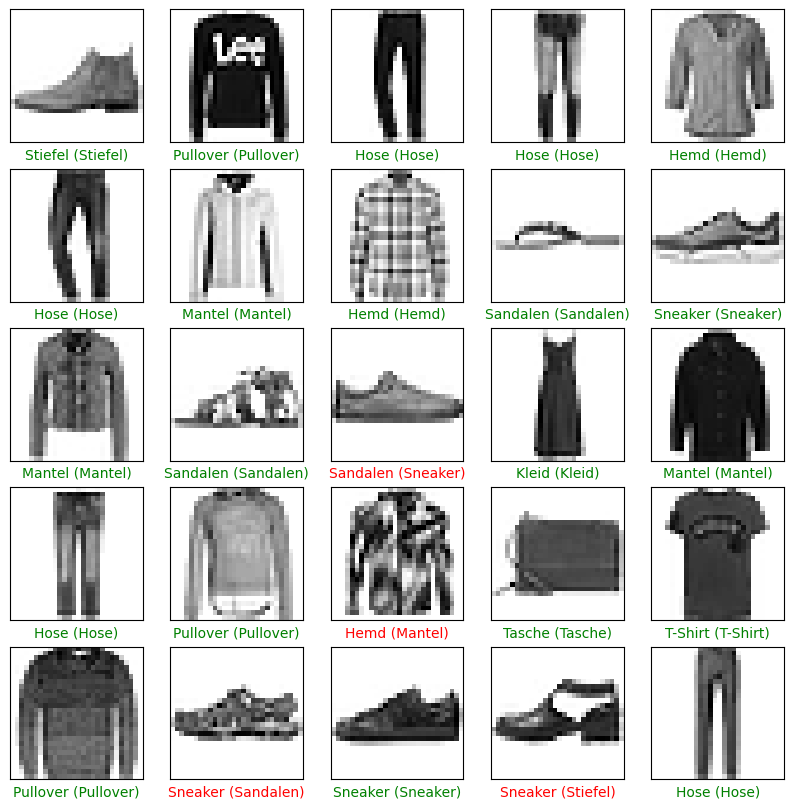

In [ ]:
# Importiere die Module
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Lade den Datensatz
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Skaliere die Pixelwerte
train_images = train_images / 255.0
test_images = test_images / 255.0

# labels enthält die Klassennummern (0-9), wir wollen die Klassennamen
# Klassennamen (wissen wir aus der Fahion-MNIST-Dokumentation)
class_names = ['T-Shirt', 'Hose', 'Pullover', 'Kleid', 'Mantel', 'Sandalen', 'Hemd', 'Sneaker', 'Tasche', 'Stiefel']

# Erstelle das Modell
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Wandelt das 2D-Bild in einen 1D-Vektor um
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'), # Eine versteckte Schicht mit 128 Neuronen und ReLU-Aktivierung
    keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal') # Eine Ausgabeschicht mit 10 Neuronen und Softmax-Aktivierung
])

# Kompiliere das Modell
model.compile(optimizer='adam', # Verwende den Adam-Optimierer
              loss='sparse_categorical_crossentropy', # Verwende die Kreuzentropie als Verlustfunktion
              metrics=['accuracy']) # Verwende die Genauigkeit als Metrik

# Trainiere das Modell
# empfohlen:  epochs=10, batch_size=32
# hier bewusst "schlechter" gesetzt, um schnelleres Training zu zeigen
model.fit(train_images, train_labels, epochs=2, batch_size=512)

# Evaluiere das Modell
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # Verwende die Testdaten und zeige den Verlust und die Genauigkeit an
print('\nTest loss:', test_loss)
print('Test accuracy:', test_acc)

# Mache einige Vorhersagen
predictions = model.predict(test_images) # Verwende das Modell, um Vorhersagen für die Testdaten zu machen
predictions = np.argmax(predictions, axis=1) # Wähle die Klasse mit der höchsten Wahrscheinlichkeit aus

# Zeige einige Beispiele
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = class_names[predictions[i]]
    true_label = class_names[test_labels[i]]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()
